In [2]:
#!pip install scorecardpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score
import scorecardpy as sc


# Reading the csv file

In [3]:
df = pd.read_csv('hmeq.csv')

### Printing first 10 values of the dataset

In [4]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [5]:
print("Shape of dataset",df.shape)
print("Information on number of non-null values and type of data: ", df.info())

Shape of dataset (5960, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
Information on number of non-null values and type of data:  None


In [6]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Checking the different number of categories for categorical variables

In [8]:
print(df["REASON"].value_counts())
print(df["JOB"].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


# Handling Missing Values

In [9]:
df["REASON"].fillna("Unknown",inplace=True)
df["MORTDUE"].fillna(0,inplace=True)
df["JOB"].fillna(df["JOB"].mode()[0],inplace=True)
df["DEROG"].fillna(value=0,inplace=True)        
df["DELINQ"].fillna(value=0,inplace=True)  
df["YOJ"].fillna(df["YOJ"].median(), inplace=True)
df["CLAGE"].fillna(0, inplace = True)
df["NINQ"].fillna(0, inplace = True)
df["CLNO"].fillna(0, inplace = True)
df["DEBTINC"].fillna(df["DEBTINC"].mean(), inplace =True)
df["VALUE"].fillna(df["VALUE"].median(), inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


# Data Analysis 

### Checking the distribution of data

0    4771
1    1189
Name: BAD, dtype: int64


<AxesSubplot:>

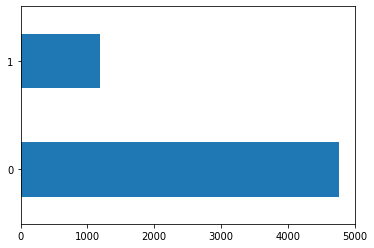

In [11]:
print(df["BAD"].value_counts())
df["BAD"].value_counts().plot(kind="barh")

### Pairplot - to check change in variable values in pairs

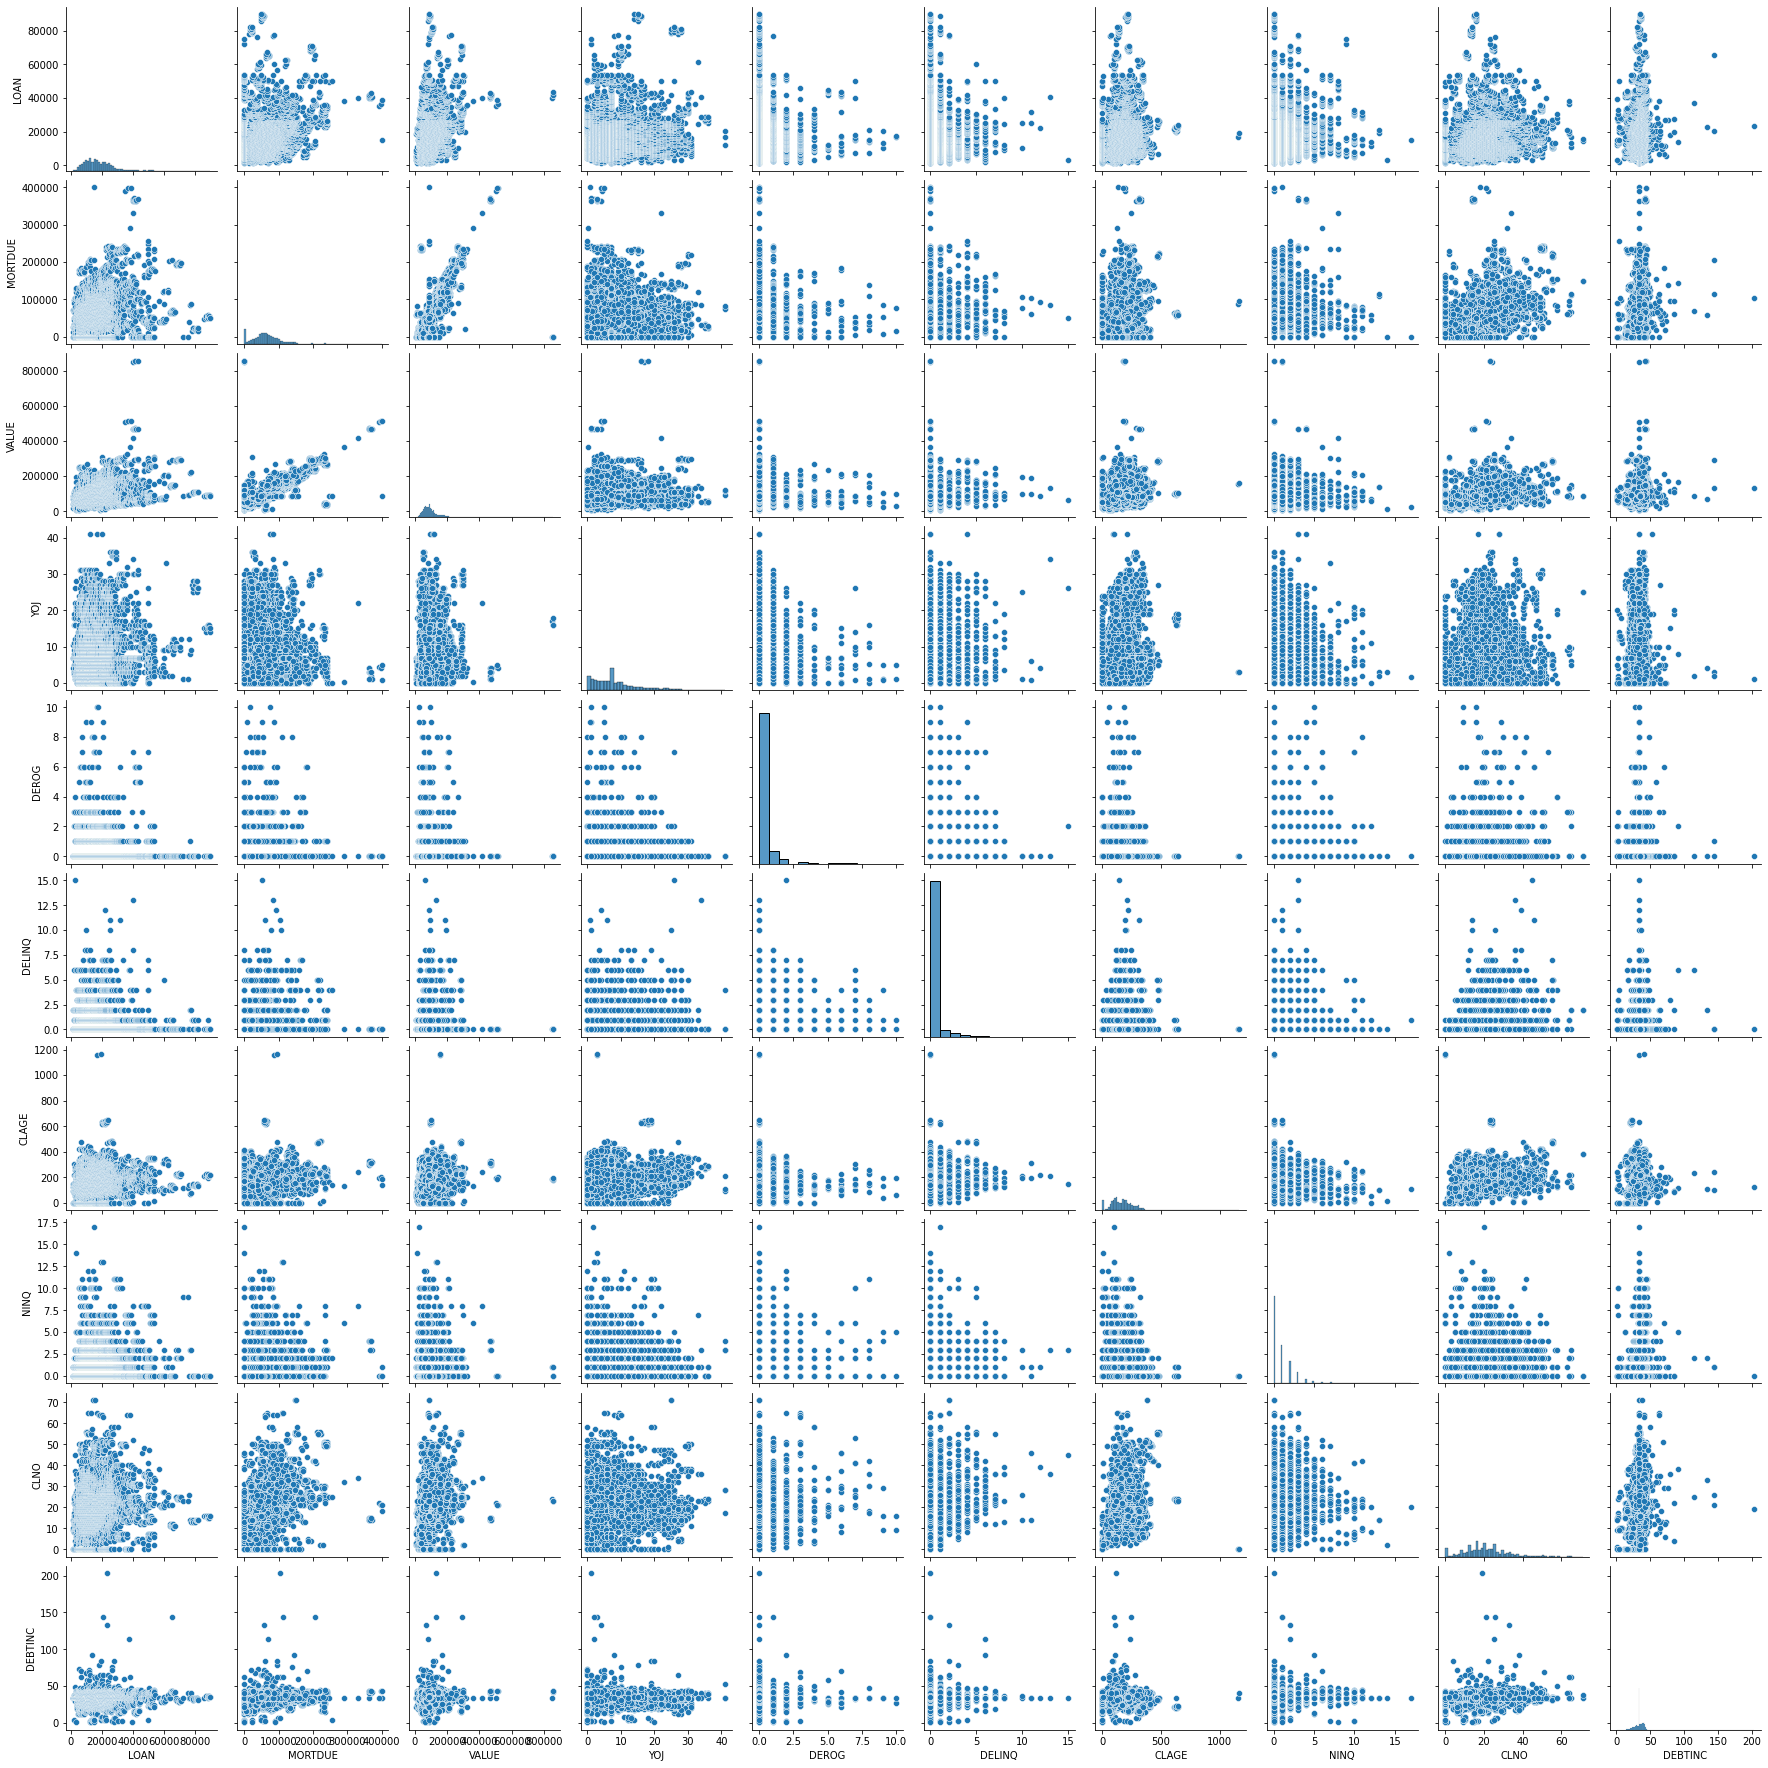

In [23]:
sns.pairplot(df.iloc[:,1:])

### Comments on the above graphs

## Plotting the distributions of all the numerical features

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')


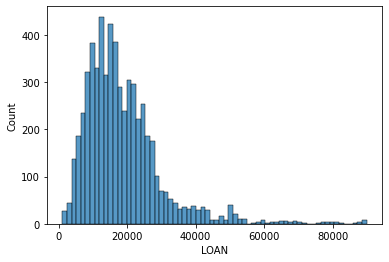

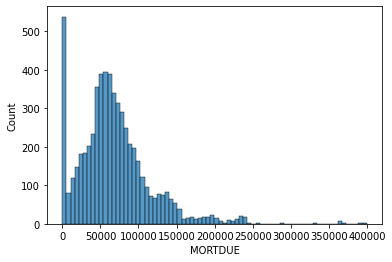

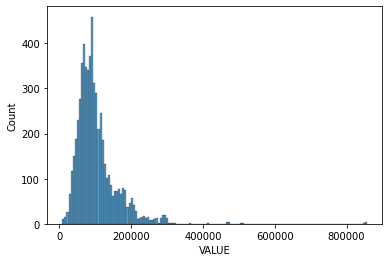

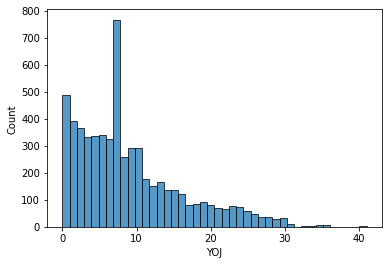

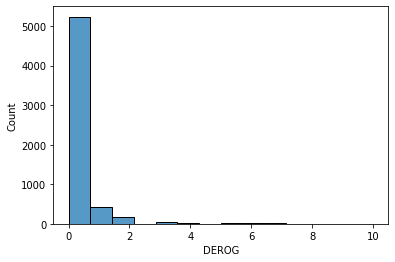

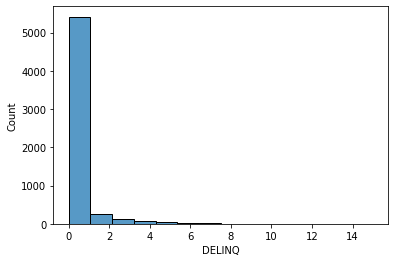

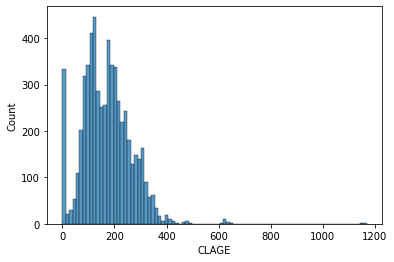

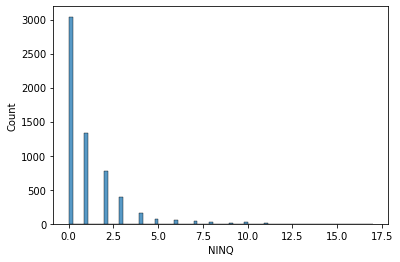

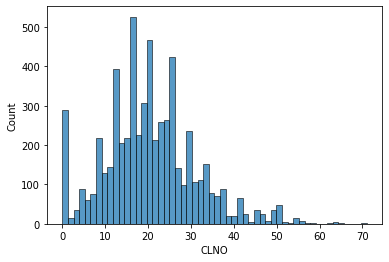

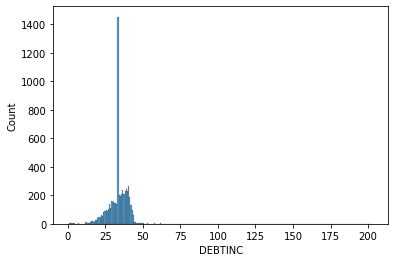

In [13]:
numeric_columns = df.iloc[:,1:]._get_numeric_data().columns
print(numeric_columns)
for i, var in enumerate(numeric_columns):
    plt.figure(i)
    sns.histplot(df[var])

## Plotting corelation 

<AxesSubplot:>

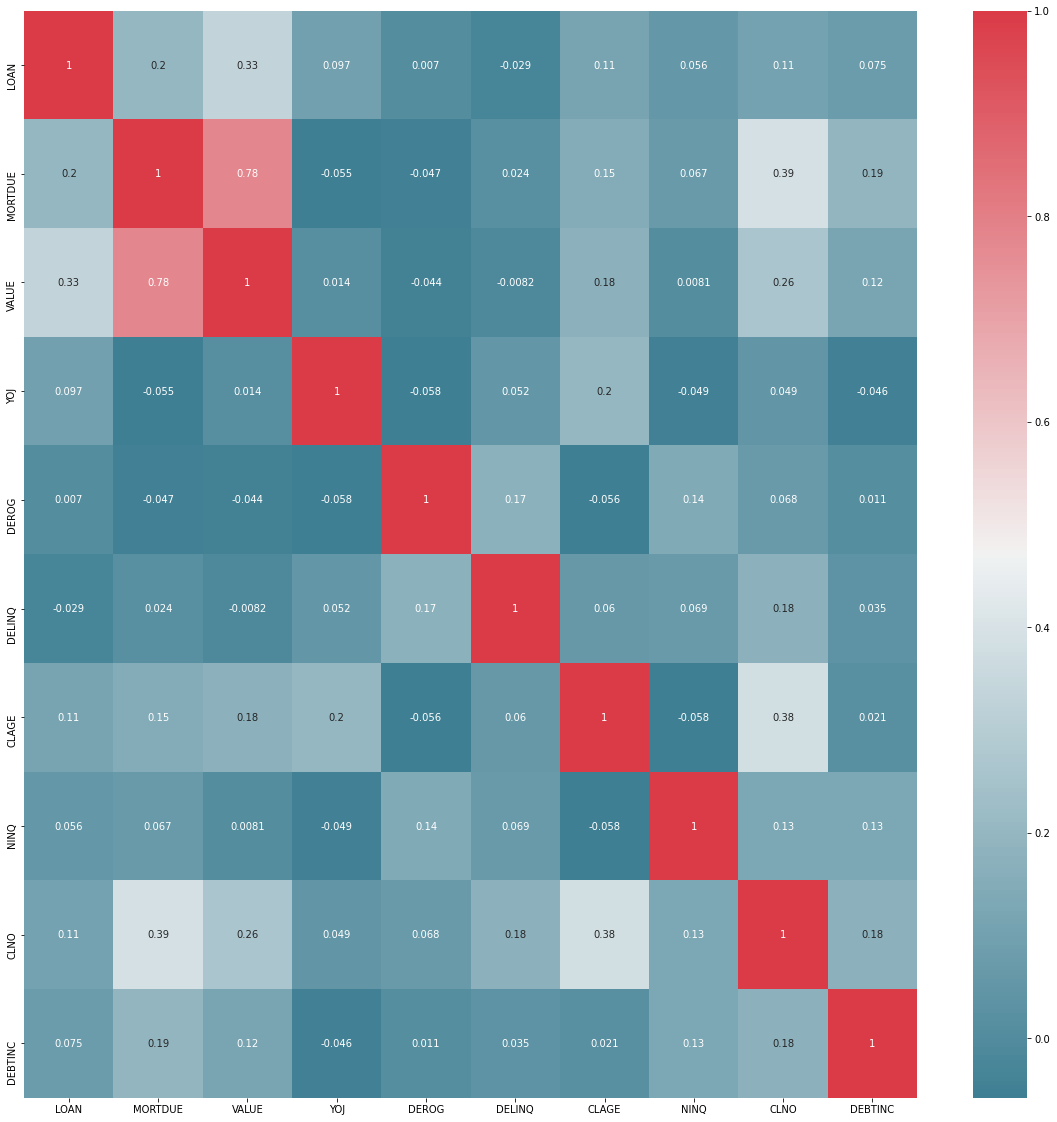

In [14]:
plt.figure(figsize=(20,20))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[numeric_columns].corr(), cmap = colormap,annot=True)

## Identifying outliers

<AxesSubplot:>

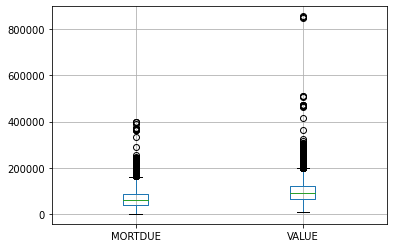

In [15]:
df.boxplot(column = ["MORTDUE", "VALUE"])

<AxesSubplot:>

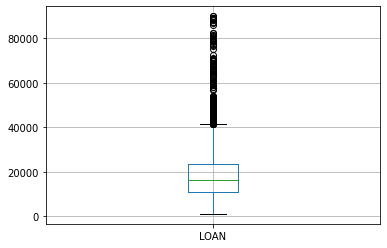

In [16]:
df.boxplot(column = ["LOAN"])

<AxesSubplot:>

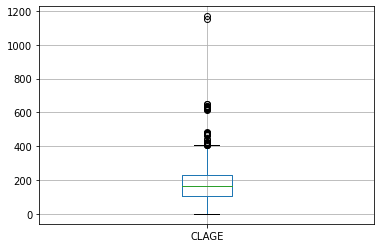

In [17]:
df.boxplot(column = ["CLAGE"])

# Data transformation - Outliers handling, Scaling and Weight of Estimation

In [26]:
train, test = sc.split_df(df,
                          y = 'BAD',
                          ratio = 0.7, seed = 32734417).values()

In [27]:
train.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000,4172.000000
mean,0.199425,18555.800575,66496.391918,100774.392196,8.849593,0.212848,0.404842,169.482457,1.087967,20.463087,33.816300
std,0.399616,11236.271942,46504.067851,56594.688550,7.302021,0.746604,1.080463,94.460120,1.686586,10.817078,7.844496
min,0.000000,1100.000000,0.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11000.000000,38663.250000,66039.000000,3.000000,0.000000,0.000000,105.651101,0.000000,14.000000,30.777632
50%,0.000000,16100.000000,61040.000000,89235.500000,7.000000,0.000000,0.000000,165.432058,0.000000,20.000000,33.779915
75%,0.000000,23400.000000,87169.000000,118194.000000,13.000000,0.000000,0.000000,226.246131,2.000000,26.000000,37.934647
max,1.000000,89000.000000,399550.000000,855909.000000,41.000000,9.000000,15.000000,1168.233561,13.000000,71.000000,203.312149


# Running a basic model  

## Spliting data into train and test

In [ ]:
y = df["BAD"]
X = df.drop("BAD", axis = 1)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [ ]:
credit_model_logreg = LogisticRegression(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                                     tol=0.0001, # Tolerance for parameters
                                     C=1.0, # Penalty constant, see below
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=20190301, # Random seed
                                     max_iter=100, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'saga',
                                     warm_start=False # Train anew or start from previous weights. For repeated training. 
                                    )

In [ ]:
credit_model_logreg.fit(X_train, y_train)

In [ ]:
y_prediction = credit_model_logreg.predict(X_test)

In [ ]:
print("")
a1 = accuracy_score(y_test,y_prediction)
f1 = f1_score(y_test, y_prediction, average="macro")
p1 = precision_score(y_test, y_prediction, average="macro")
r1 = recall_score(y_test, y_prediction, average="macro")
score = credit_model_logreg.score(X_test, y_test)
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("model score : ",score)

# Implementing WOE - Weights of evidence